# CS445 Lab 2: Visualizations Using Seaborn

## Chosen Dataset: Forest Fires

**Dataset Explanation**  
The Forest Fires dataset, sourced from the UCI Machine Learning Repository, contains meteorological data used to **predict the burned area of forest fires** in the **northeast region of Portugal** (Cortez, et al.). It includes features such as temperature, wind speed, rainfall, and various fire weather indices.

## Initial Data Visualization Setup

We begin by importing the necessary libraries and loading the dataset to explore its structure.


In [193]:
# Necessary import statements
import pandas as pd

# Read the data
df = pd.read_csv('forestfires.csv')

# Display a preview of the data
print(df.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


# Visualization 1: Hexbin-like Plot of Binned Drought Code (DC) vs Area Burned

**Purpose and Rationale**  
This hexbin-like plot visualizes the relationship between Drought Code (DC) values and the area burned in forest fires. 

## Insights and Interpretations:
1. The majority of forest fires occur within the **60-80 DC** value range.
2. The highest concentration of fires burned **a total area of zero**.

**Interpretation:** Based on these insights, we can assume that most forest fires occur in regions with **moderate drought conditions**, where fires tend to be more controlled or less intense.


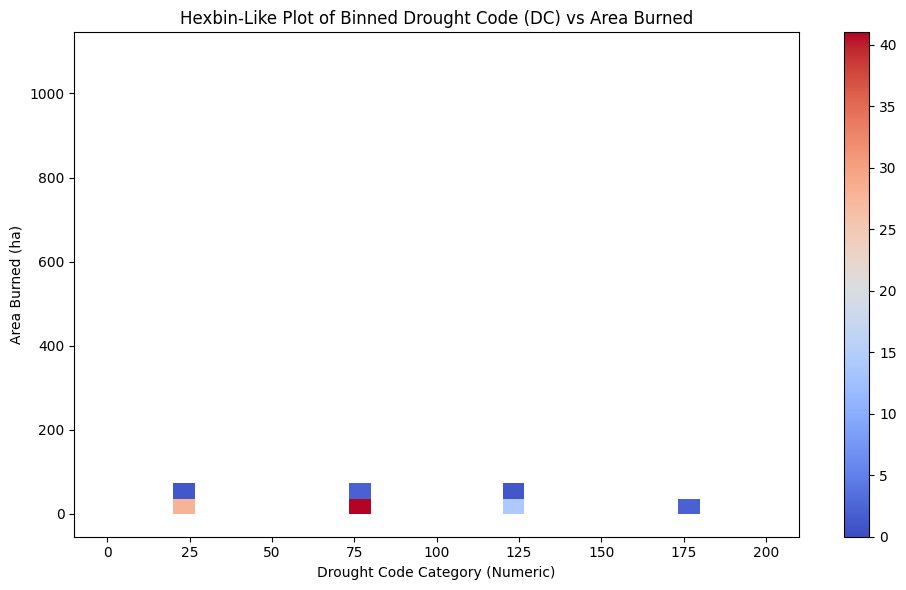

In [209]:
# Necessary import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('forestfires.csv')

# Bin DC into categories
dc_bins = [0, 50, 100, 150, 200]
dc_labels = ['Low DC (0-50)', 'Medium DC (50-100)', 'High DC (100-150)', 'Very High DC (150-200)']
df['DC_category'] = pd.cut(df['DC'], bins=dc_bins, labels=dc_labels)

# Convert the 'DC_category' to numeric values (use midpoints of the bins)
dc_midpoints = [25, 75, 125, 175]
df['DC_numeric'] = pd.cut(df['DC'], bins=dc_bins, labels=dc_midpoints)

# Create hexbin-like plot using seaborn.histplot with hex=True
plt.figure(figsize=(10, 6))
sns.histplot(
    x=df['DC_numeric'].astype(float),  # ensure numeric for plot
    y=df['area'],
    bins=30,
    cbar=True,
    cmap='coolwarm',
    pmax=1.0,
    binrange=[[0, 200], [0, df['area'].max()]],
    discrete=(False, False),
)

# Set plot title and labels
plt.title('Hexbin-Like Plot of Binned Drought Code (DC) vs Area Burned')
plt.xlabel('Drought Code Category (Numeric)')
plt.ylabel('Area Burned (ha)')

# Display the plot
plt.tight_layout()
plt.show()


# Visualization 2: Pair Plot

**Purpose and Rationale**  
This pair plot visualizes the relationship between rainfall levels and the area burned by forest fires. 

## Insights and Interpretations:
1. The majority of forest fires occur with **low or no rainfall**.
2. Most fires result in **minimal or no area burned**.

**Interpretation:**  
From these insights, we can assume that **rainier climates** contribute to both **fewer fires** and **smaller fires**. It seems that rainfall plays a crucial role in containing or preventing large forest fires.


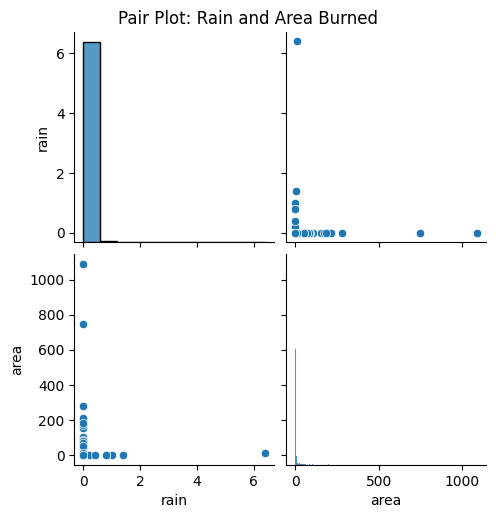

In [210]:
# Necessary import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('forestfires.csv')

# Create a pair plot focusing on rain and area
sns.pairplot(df[['rain', 'area']])
plt.suptitle('Pair Plot: Rain and Area Burned', y=1.02)
plt.show()


# Visualization 3: Bell Plot (Violin Plot) for Burned Area by Relative Humidity Category

**Purpose and Rationale**  
This visualization aims to analyze how the distribution of the burned area changes under finer-grained **Relative Humidity (RH)** categories. 

## Insights and Interpretations:
1. **Majority of large fires** occur at **very low or low relative humidity**.
2. The **vast majority of fires** in general are **small fires**.
3. The **lower the RH value**, the **higher the average fire size**.

**Interpretation:**  
Based on the above insights, we can conclude that **most fires**, and particularly **large fires**, occur in environments with **lower relative humidity**. This suggests that **drier conditions** tend to lead to larger fires.



/var/folders/kk/nr80b8_s6yn60fdftc7kshn40000gn/T/ipykernel_4427/1919347887.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='RH_category', y='log_area', data=df, palette='coolwarm', inner='box')


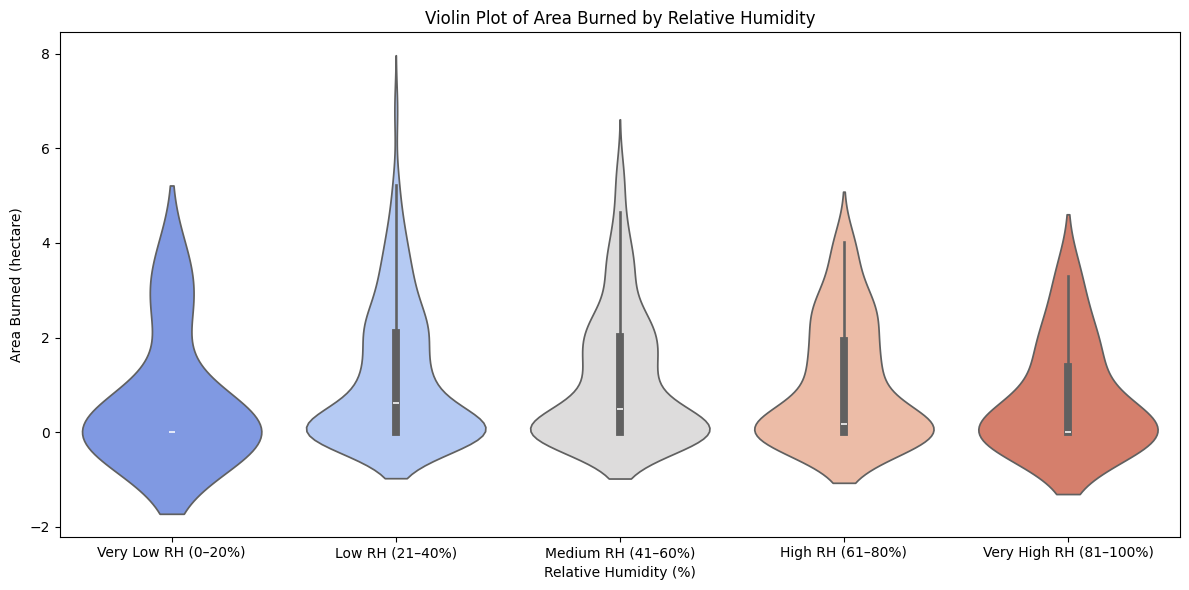

In [211]:
# Necessary import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('forestfires.csv')

# Apply log transformation to 'area'
df['log_area'] = df['area'].apply(lambda x: np.log(x + 1))

# Define RH bins and labels
rh_bins = [0, 20, 40, 60, 80, 100]
rh_labels = ['Very Low RH (0–20%)', 'Low RH (21–40%)', 'Medium RH (41–60%)', 'High RH (61–80%)', 'Very High RH (81–100%)']

# Create a new column with binned RH categories
df['RH_category'] = pd.cut(df['RH'], bins=rh_bins, labels=rh_labels)

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='RH_category', y='log_area', data=df, palette='coolwarm', inner='box')

# Set plot title and axis labels
plt.title('Violin Plot of Area Burned by Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Area Burned (hectare)')

# Display the plot
plt.tight_layout()
plt.show()


# Visualization 4: Stacked Bar Plot of Area Burned by Temperature Category

**Purpose and Rationale**  
This visualization is designed to visualize how the **area burned** is distributed across different **temperature categories**. 

## Insights and Interpretations:
1. **The majority of forest fires** occurred between **10°C and 30°C**.
2. **Most fires** occurred at **low or medium relative humidity levels**.
   
**Interpretation:**  
From these observations, we can conclude that the **most fires**, and particularly **the largest fires**, occur in **warmer**, **drier** conditions. This suggests that **hotter and drier climates** are more conducive to larger and more frequent fires.


/var/folders/kk/nr80b8_s6yn60fdftc7kshn40000gn/T/ipykernel_4427/2589824095.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Temp_category', 'RH_category'])['log_area'].sum().unstack(fill_value=0)


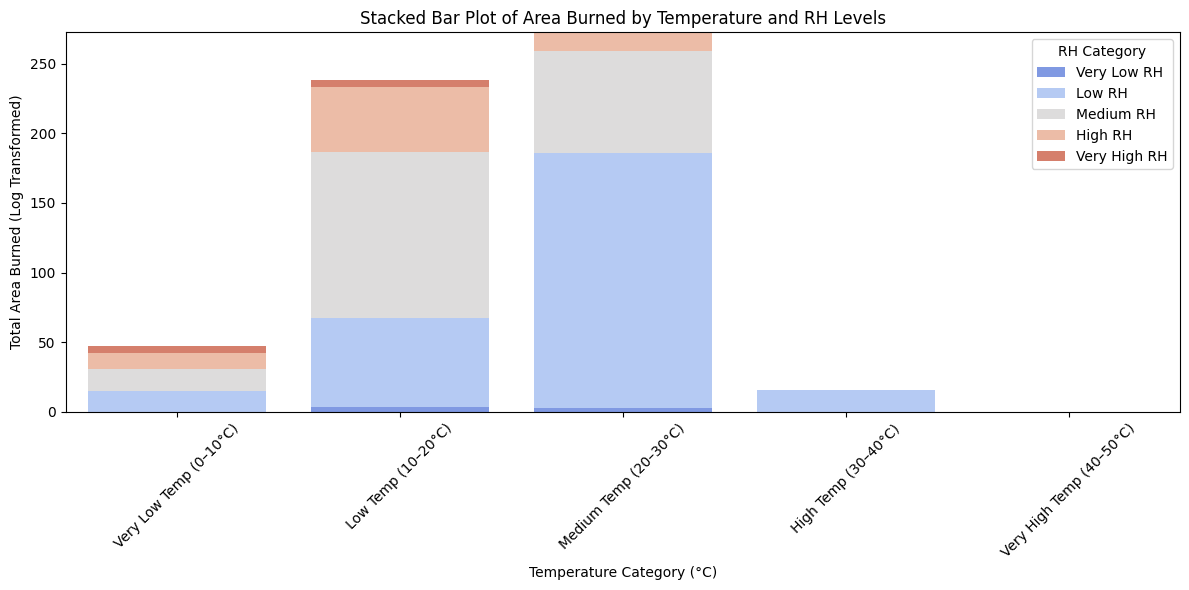

In [214]:
# Necessary import statements
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('forestfires.csv')

# Apply log transformation to 'area'
df['log_area'] = df['area'].apply(lambda x: np.log(x + 1))

# Define temperature bins and labels
temp_bins = [0, 10, 20, 30, 40, 50]
temp_labels = ['Very Low Temp (0–10°C)', 'Low Temp (10–20°C)', 'Medium Temp (20–30°C)', 'High Temp (30–40°C)', 'Very High Temp (40–50°C)']
df['Temp_category'] = pd.cut(df['temp'], bins=temp_bins, labels=temp_labels)

# Define RH bins and labels
rh_bins = [0, 20, 40, 60, 80, 100]
rh_labels = ['Very Low RH', 'Low RH', 'Medium RH', 'High RH', 'Very High RH']
df['RH_category'] = pd.cut(df['RH'], bins=rh_bins, labels=rh_labels)

# Group by Temp and RH categories, summing the log area
grouped = df.groupby(['Temp_category', 'RH_category'])['log_area'].sum().unstack(fill_value=0)

# Reorder index to ensure consistent bar positioning
grouped = grouped.reindex(temp_labels)

# Plot using seaborn to simulate stacking
plt.figure(figsize=(12, 6))
bottom = np.zeros(len(grouped))

# Loop through each RH category and plot a layer
for rh in grouped.columns:
    sns.barplot(
        x=grouped.index,
        y=grouped[rh],
        label=rh,
        bottom=bottom,
        color=sns.color_palette("coolwarm", len(grouped.columns))[list(grouped.columns).index(rh)]
    )
    bottom += grouped[rh].values

# Set titles and labels
plt.title('Stacked Bar Plot of Area Burned by Temperature and RH Levels')
plt.xlabel('Temperature Category (°C)')
plt.ylabel('Total Area Burned (Log Transformed)')
plt.legend(title='RH Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualization 5: Scatter Plot Colored by Temperature

**Purpose and Rationale**  
The purpose of this scatter plot is to examine the relationship between **wind speed** and **fire area**.

By visualizing the **log-transformed area** versus **wind speed**, and coloring the data points based on **temperature**, this plot provides insights into how **wind** and **temperature** affect fire size.

## Insights and Interpretations:
1. **The majority of fires** occur at wind speeds between **2 and 6 km/h**.
2. **The majority of these fires** within this wind speed range occur at **temperatures of 24°C and above**.
   
**Interpretation:**  
We can conclude that most fires, especially the **larger fires**, occur in **warmer**, **moderately windy** conditions. This suggests that **moderate winds combined with warm temperatures** are likely contributing factors for larger fires.


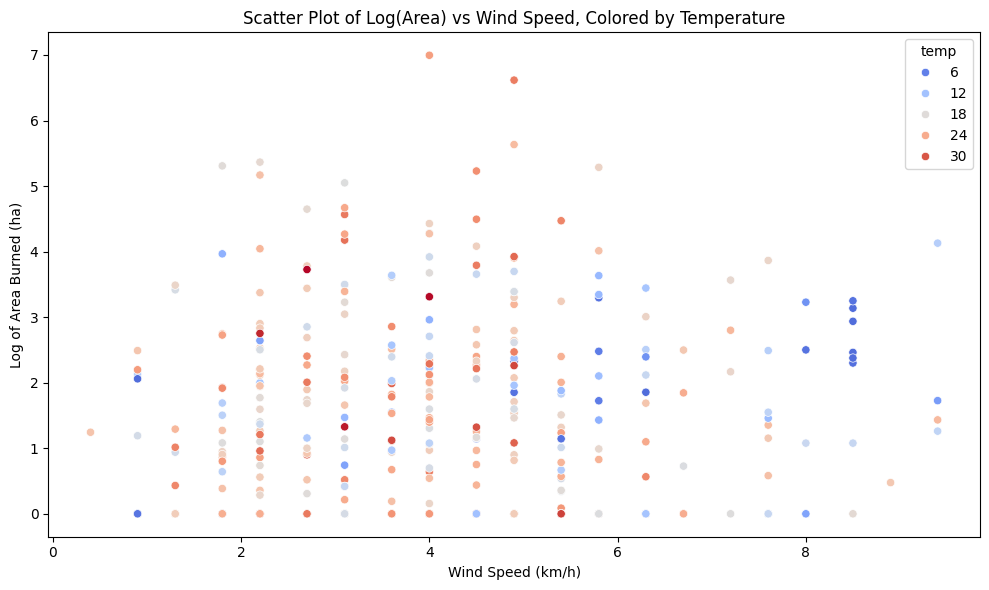

In [215]:
# Necessary import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('forestfires.csv')

# Apply log transformation to area
df['log_area'] = df['area'].apply(lambda x: np.log(x + 1))  # add 1 to avoid log(0)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind', y='log_area', hue='temp', palette='coolwarm', data=df)

# Add title and labels
plt.title('Scatter Plot of Log(Area) vs Wind Speed, Colored by Temperature')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Log of Area Burned (ha)')

# Improve layout
plt.tight_layout()
plt.show()


# References:
# Cortez, P. & Morais, A. (2007). Forest Fires [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.